In [114]:
import matplotlib.pyplot as plt
from matplotlib import rc  ### 이 줄과
rc('font', family='AppleGothic') 			## 이 두 줄을 
plt.rcParams['axes.unicode_minus'] = False  ## 추가해줍니다. 

import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

df = pd.read_csv("./대전광역시 유성구_지역화폐 발급월별 소비금액 지수 데이터_20220531.csv", encoding='CP949')

df["발급년"]=df["발급년"].astype(str)
df["발급월"]=df["발급월"].astype(str)

for i in range(2,3):
    df["발급월"+str(i)] = df["발급월"].astype('str').str.zfill(i) # 1~9월까지 0을 채워서 두 자리까지..
    
df["발급년월"] = df["발급년"] + df["발급월2"] #컬럼 두 개 합치기 = 2xxx0x 형태로 만들기

from datetime import datetime

df['발급년월']=df['발급년월'].apply(lambda _ : datetime.strptime(_,'%Y%m'))

In [115]:
def change_age(text:str):
    return text[:2]

df['연령대'] = df['연령대'].map(change_age).astype(int)
df.head()

,발급년,발급월,광역시도코드,광역시도명,시군구코드,시군구명,법정동코드,법정동명,연령대,성별,지수_이용건수,지수_이용금액,발급월2,발급년월
0,2020,5,30,대전광역시,30110.0,동구,3011010200,인동,30,여성,100.0,100.0,05,2020-05-01
1,2020,5,30,대전광역시,30110.0,동구,3011010400,천동,40,여성,100.0,100.0,05,2020-05-01
2,2020,5,30,대전광역시,30110.0,동구,3011010500,가오동,30,남성,100.0,100.0,05,2020-05-01
3,2020,5,30,대전광역시,30110.0,동구,3011010500,가오동,40,여성,100.0,100.0,05,2020-05-01
4,2020,5,30,대전광역시,30110.0,동구,3011010600,신흥동,30,남성,100.0,100.0,05,2020-05-01


In [127]:
df_20 = df[(df["연령대"] == 20) & (df["시군구명"] == '유성구') & (df["성별"] == '남성')]

In [128]:
df_20.head()

,발급년,발급월,광역시도코드,광역시도명,시군구코드,시군구명,법정동코드,법정동명,연령대,성별,지수_이용건수,지수_이용금액,발급월2,발급년월
216,2020,5,30,대전광역시,30200.0,유성구,3020010100,원내동,20,남성,100.0,100.0,05,2020-05-01
229,2020,5,30,대전광역시,30200.0,유성구,3020010300,대정동,20,남성,100.0,100.0,05,2020-05-01
238,2020,5,30,대전광역시,30200.0,유성구,3020010600,계산동,20,남성,100.0,100.0,05,2020-05-01
248,2020,5,30,대전광역시,30200.0,유성구,3020011100,봉명동,20,남성,100.0,100.0,05,2020-05-01
258,2020,5,30,대전광역시,30200.0,유성구,3020011200,구암동,20,남성,100.0,100.0,05,2020-05-01


<AxesSubplot:xlabel='발급년월', ylabel='지수_이용건수'>

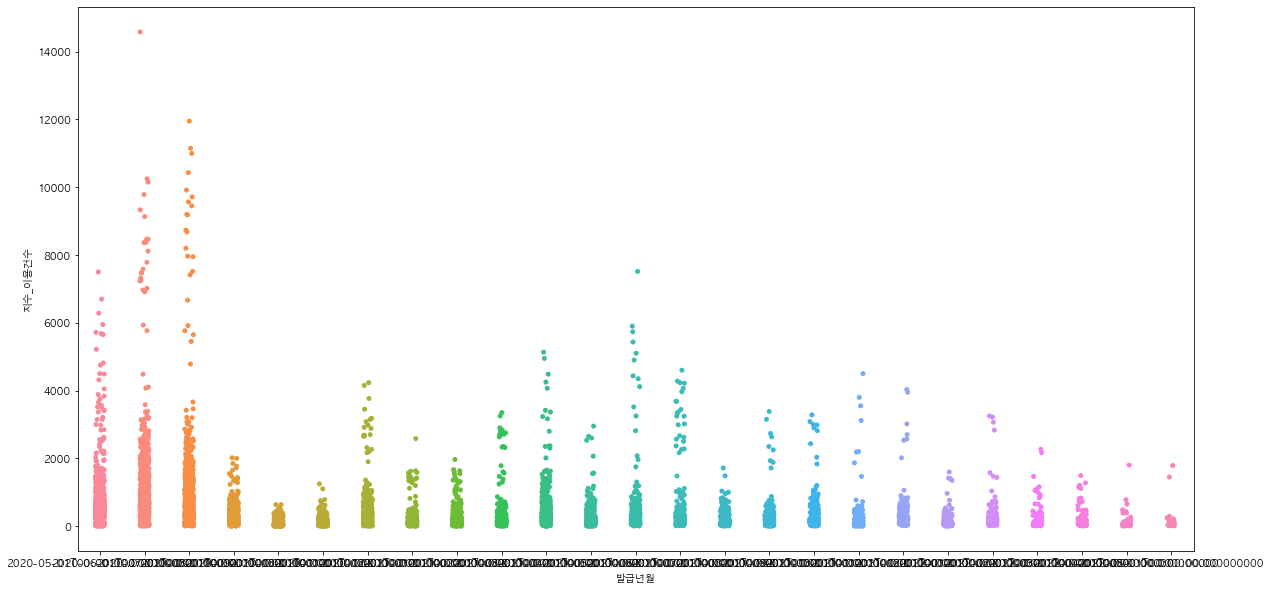

In [129]:
plt.figure(figsize=(20,10))
sns.stripplot(x='발급년월', y='지수_이용건수', data=df_20)

<AxesSubplot:xlabel='발급년월', ylabel='지수_이용금액'>

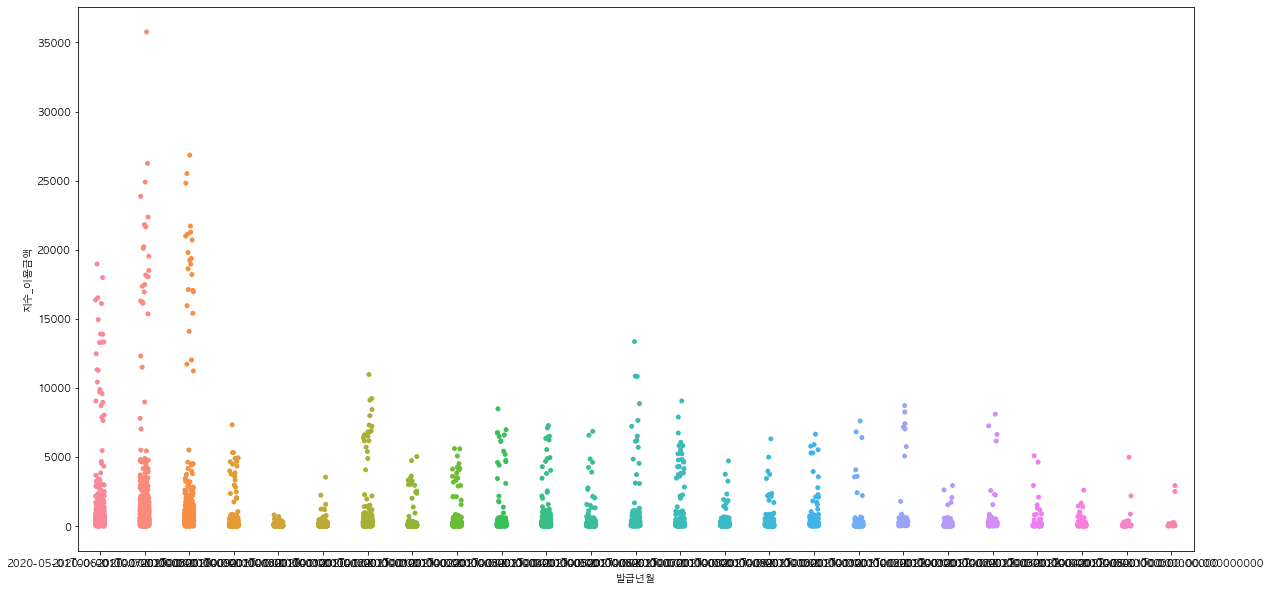

In [130]:
plt.figure(figsize=(20,10))
sns.stripplot(x='발급년월', y='지수_이용금액', data=df_20)

<AxesSubplot:xlabel='법정동명', ylabel='지수_이용금액'>

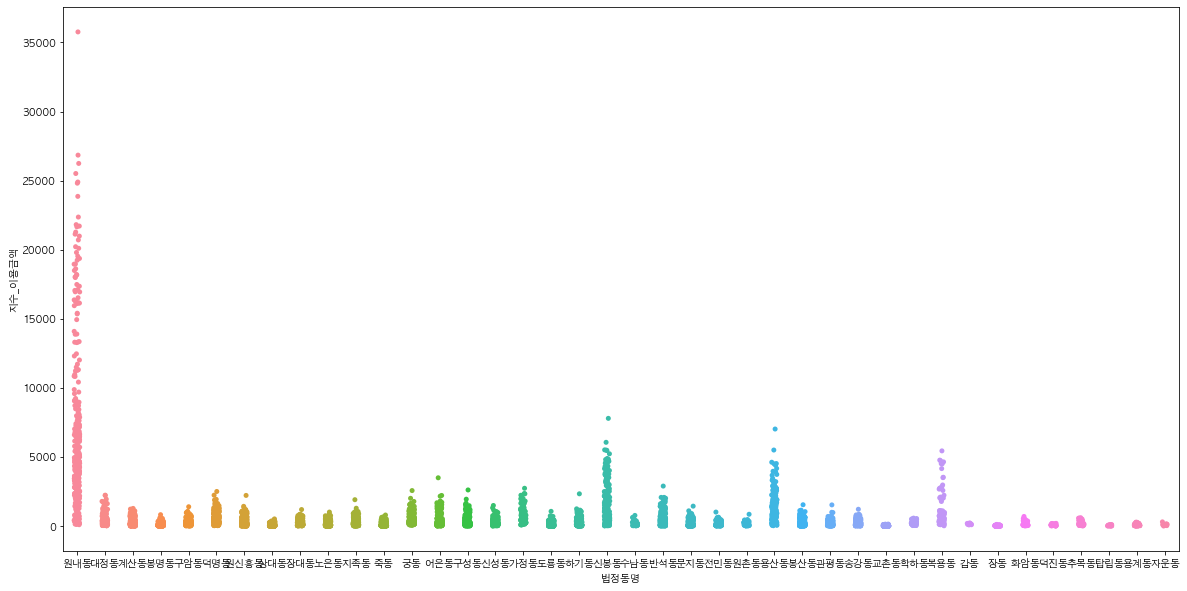

In [132]:
plt.figure(figsize=(20,10))
sns.stripplot(x='법정동명', y='지수_이용금액', data=df_20)

In [102]:
# df = pd.pivot_table(data = df, index = '법정동명', values = "지수_이용금액").T
df = pd.pivot_table(data = df, index = '발급년월', values = "지수_이용금액", columns = "성별").T

In [ ]:
df[[성별]]

<AxesSubplot:xlabel='법정동명,성별'>

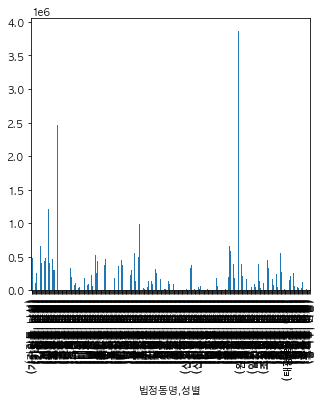

In [109]:
A_sum = df.groupby(["법정동명","성별"])["지수_이용금액"].sum().plot(kind = 'bar')
A_sum

In [47]:
A_mean = df.groupby(["법정동명","성별"])["지수_이용금액"].mean()

In [48]:
B_sum = df.groupby(["법정동명","연령대"])["지수_이용금액"].sum()

In [49]:
B_mean = df.groupby(["법정동명","연령대"])["지수_이용금액"].mean()

<AxesSubplot:xlabel='법정동명', ylabel='법정동명'>

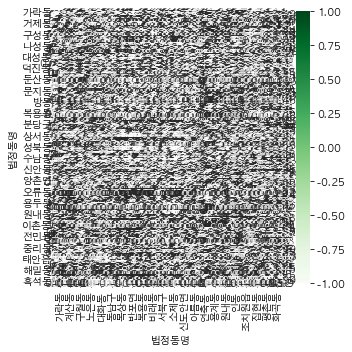

In [94]:
#heatmap으로 상관관계를 표시
import seaborn as sb
plt.rcParams["figure.figsize"] = (5,5)
sb.heatmap(df.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )

In [8]:
df = df.astype({'법정동코드':'str'})

In [23]:
# def graph_age_female(age):
#         a2= df[(df['성별']=='여성') & (df['연령대']==age) ]


#         df_usect_sort = a2.sort_values('지수_이용건수',ascending=False)
#         df_usect_sort.drop_duplicates(['시군구코드'],inplace=True)
# #         중복순위를 제거 하기위해 중벅된 업종은 삭제

#         merge_table = pd.merge(df_usect_sort,df_where,how='left',left_on='시군구코드',right_on='법정동코드')


#         a2= df[(df['성별']=='여성') & (df['연령대']==age) ]
#         df_usect_sort = a2.sort_values('지수_이용금액',ascending=False)
#         df_usect_sort.drop_duplicates(['시군구코드'],inplace=True)



#         merge_table2 = pd.merge(df_usect_sort,df_where,how='left',left_on='시군구코드',right_on='법정동코드')


#         plt.figure(figsize=(15,15))
#         plt.subplot(1,2,1)

#         x= df['법정동명'].values
#         y =df['지수_이용건수'].values
#         plt.barh(x,y)
        
#         str_title=str(age)+"대 여성의 카드이용건수"
#         plt.yticks(fontsize=15)
#         plt.title(str_title,fontsize=20)
    
        
        
#         plt.subplot(1,2,2)
#         x2= df['법정동명'].values
#         y2 =df['지수_이용금액'].values
#         plt.barh(x2,y2,color='red',alpha=0.3,linewidth=5)
#         str_title2=str(age)+"대 여성의 카드이용금액"
#         plt.yticks(fontsize=15)
#         plt.title(str_title2,fontsize=20)
        
        
        
        
# def graph_age_male(age):
#         a2= df[(df['성별']=='여성') & (df['연령대']==age) ]


#         df_usect_sort = a2.sort_values('지수_이용건수',ascending=False)
#         df_usect_sort.drop_duplicates(['시군구코드'],inplace=True)
# #         중복순위를 제거 하기위해 중벅된 업종은 삭제ㅋ

#         merge_table = pd.merge(df_usect_sort,df_where,how='left',left_on='시군구코드',right_on='법정동코드')


#         a2= df[(df['성별']=='여성') & (df['연령대']==age) ]
#         df_usect_sort = a2.sort_values('지수_이용금액',ascending=False)
#         df_usect_sort.drop_duplicates(['시군구코드'],inplace=True)



#         merge_table2 = pd.merge(df_usect_sort,df_where,how='left',left_on='시군구',right_on='법정동코드')


#         plt.figure(figsize=(15,15))
#         plt.subplot(1,2,1)

#         x= merge_table['법정동명'].values
#         y =merge_table['지수_이용건수'].values
#         plt.barh(x,y)
        
#         str_title=str(age)+"대 여성의 카드이용건수"
#         plt.yticks(fontsize=15)
#         plt.title(str_title,fontsize=20)
    
        
        
#         plt.subplot(1,2,2)
#         x2= merge_table2['법정동명'].values
#         y2 =merge_table2['지수_이용금액'].values
#         plt.barh(x2,y2,color='red',alpha=0.3,linewidth=5)
#         str_title2=str(age)+"대 여성의 카드이용금액"
#         plt.yticks(fontsize=15)
#         plt.title(str_title2,fontsize=20)
        